In [10]:
# Grzegorz B. Zaleski (418494)
# Dowód matematyczny twierdzeń przedstawie w pseudokodzie latexowym.
# X ma rozkład dystreny ponieważ suma prawdopodobieństw (przeliczalnie wielu) wynosi 1, tj
# \sum_{k = 1}^{inf} P(X = k) + \sum_{k = 1}^{inf} P(X = -k) + P(X = 0) = 1
# Via def. P(X = k) możemy przekształcić:
# 2\sum_{k = 1}^{inf}1/(4k(k+1)) = 0.5
# \sum_{k = 1}^{inf}1/(4k(k+1)) = 0.25
# sum_{k = 1}^{inf}1/(k(k+1)) = 1
# sum_{k = 1}^{inf}1/(k(k+1)) = lim_{n to inf} sum_{k = 1}^{n} 1/(k(k+1)) = lim_{n to inf} 1 - 1/(n+1) = 1
# CKD

In [ ]:
# Podobnie zaczynajać można pokazać brak średniej:
# S = sum_{k = 1}^{inf} k/(4k(k+1)) + \sum_{k = 1}^{inf} -k/(4k(k+1)) + 0
# 4S = sum_{k = 1}^{inf} k/(k(k+1)) + \sum_{k = 1}^{inf} -k/(k(k+1))
# 4S = sum_{k = 1}^{inf} 1/(k+1) + \sum_{k = 1}^{inf} -1/(k+1)
# Srednia nie istnieje ponieważ szereg sum_{k = 1}^{inf} 1/(k+1) jest rozbieżny

In [3]:
import numpy as np
import pandas
import matplotlib.pyplot as plt 

In [3]:
def P(k):
    if k == 0:
        return 0.5
    return 1/(4 * abs(k) * (abs(k)+ 1))

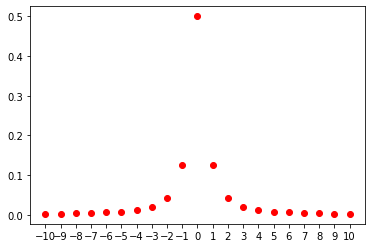

In [7]:
args = np.arange(-10, 11)
values = np.array(list(map(P, args)))
plt.xticks(np.arange(-10,11))
plt.plot(args, values, 'ro')
plt.show() # Wykres P(X = k) dla k \in [-10, 10]

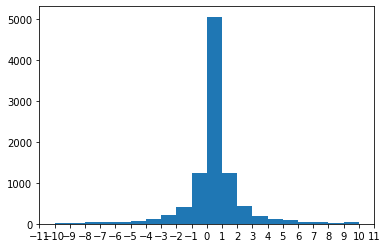

In [6]:
import random
import math

# Przypadek X = 0, oraz korzystajac z symetrzyczności P(X = k) = P(X = -k)
# wybiera znak
def get_sgn():
    f = random.random()
    if f < 1/2:
        return 0
    return np.sign(f - 3/4)

# Funkcja losująca liczbę na podstawie obserwacji z labolatoriów
def get_value():
    sign = get_sgn()
    if sign == 0:
        return 0
    p = random.random()
    return sign * math.floor(1/p)

def get_samples(N):
    return np.array([get_value() for x in range(N)])
        
N = int(1e4)
values = get_samples(N)
# Kosmetyczna zmiany zwiększające czytelnosc histogramu       
plt.xticks(np.arange(-20,21))                                                  
plt.hist(values, bins = np.arange(-10,11,1))
plt.show()

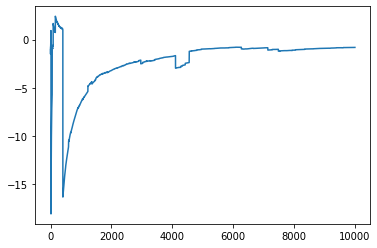

In [10]:
values = get_samples(N)
means = []
for i in range(N):
    means.append(np.mean(values[:(i + 1)]))

means = np.array(means)
plt.plot(means)
plt.show()
# Ciąg powoli zbiega do 0 

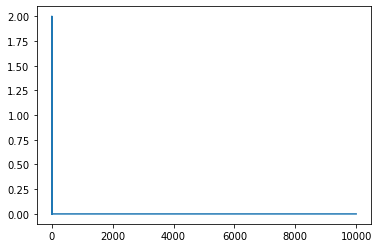

In [12]:
values = get_samples(N)
medians = []
for i in range(N):
    medians.append(np.median(values[:(i + 1)]))

medians = np.array(medians)
plt.plot(medians)
plt.show()
# Ciąg zbiega do zera znacznie szybciej dla mediany zmiast średniej (niemal od razu).

In [ ]:
# Mając podane X + c, z nieznanym parametrem c, szybciej znajdziemy wartość c używajac mediany ponieważ ciąg znacznie szybciej zbiega (do wartości c, zauwazmy że w poprzednich przykładach rozwaliśmy X + 0)